In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.initializers import VarianceScaling
import matplotlib.pyplot as plt
from tensorflow.keras.applications import  VGG16
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Cats&Dogs/trainingDataset'
test_path = '/content/drive/MyDrive/Cats&Dogs/testDataset'

Mounted at /content/drive


In [ ]:
image_size = (256, 256)
batch_size = 32

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    drive_path,
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle = True
)
validation_generator =tf.keras.preprocessing.image_dataset_from_directory(
    drive_path,
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle = True
)
Test =tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    label_mode = 'int',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 8994 files belonging to 2 classes.
Using 7196 files for training.
Found 8994 files belonging to 2 classes.
Using 1798 files for validation.
Found 1018 files belonging to 2 classes.


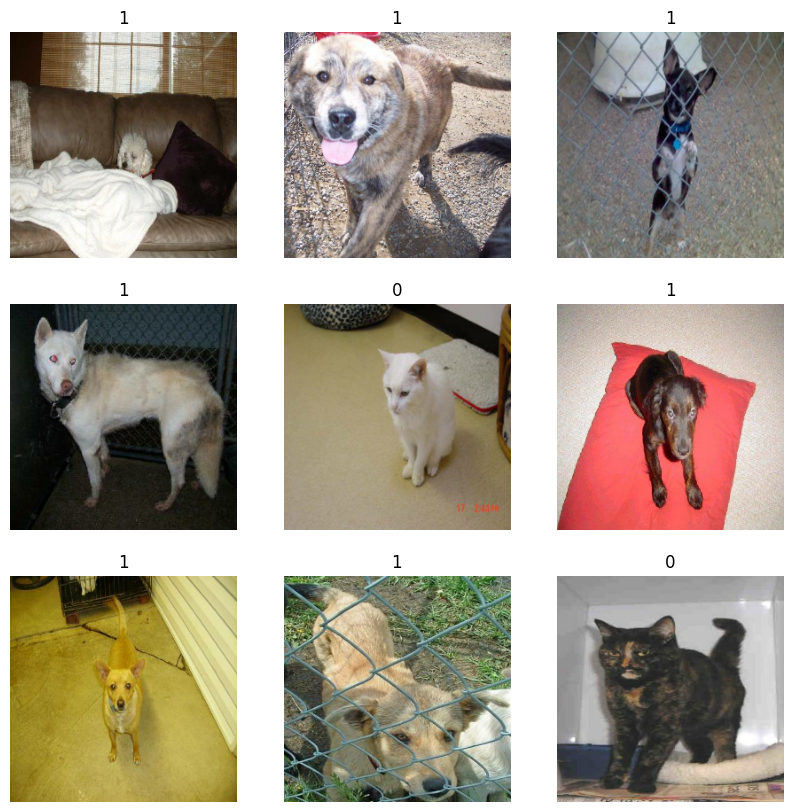

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Model1

In [ ]:
init = VarianceScaling(scale = 2,mode = "fan_avg",distribution = "uniform")
model1 = Sequential()

# Four Conv Layers , Maxpooling and BatchNormalization
# kernel size 5
# Flatten Layer
# Fully connected layer : 2 Dense layers and dropout by 0.5
model1.add(layers.Conv2D(filters=32, kernel_size= (5, 5), activation='relu', input_shape=(256,256, 3),kernel_initializer=init))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())

model1.add(layers.Dense(256, activation='relu',kernel_initializer=init))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(2, activation='softmax',kernel_initializer=init))

model1.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 252, 252, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Bat  (None, 122, 122, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
lr_schedule = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model1.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
      callbacks=[early_stopping,lr_schedule]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 848s 3s/step - loss: 4.4162 - accuracy: 0.5610 - val_loss: 0.6676 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 33s 144ms/step - loss: 0.6690 - accuracy: 0.6184 - val_loss: 0.6476 - val_accuracy: 0.6135 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 33s 142ms/step - loss: 0.6282 - accuracy: 0.6504 - val_loss: 0.6083 - val_accuracy: 0.6557 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 32s 141ms/step - loss: 0.6255 - accuracy: 0.6711 - val_loss: 0.5983 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 32s 141ms/step - loss: 0.5935 - accuracy: 0.6864 - val_loss: 0.5891 - val_accuracy: 0.6958 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 32s 142ms/step - loss: 0.5551 - accuracy: 0.7164 - val_loss: 0.5830 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 32s 141ms/s

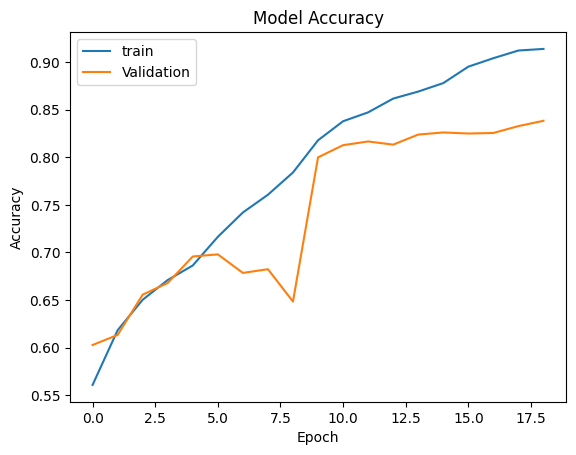

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'

if 'acc' in history.history :
    k = 'acc'

if k != '' :
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

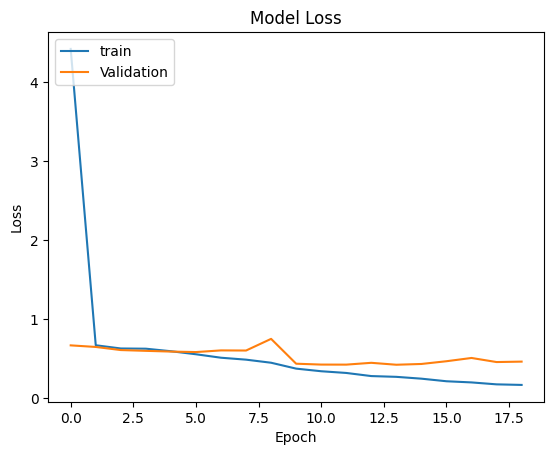

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model1.evaluate(Test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

32/32 [==============================] - 136s 3s/step - loss: 0.3972 - accuracy: 0.8379
Test Loss: 0.3972
Test Accuracy: 83.79%


In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model1.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 1s 37ms/step
              precision    recall  f1-score   support

        Cats       0.83      0.85      0.84       513
        Dogs       0.84      0.83      0.84       505

    accuracy                           0.84      1018
   macro avg       0.84      0.84      0.84      1018
weighted avg       0.84      0.84      0.84      1018

[[435  78]
 [ 87 418]]


# Model2

In [ ]:
model2 = Sequential()

# Three Conv Layers , Maxpooling and BatchNormalization
# kernel size 3
# Flatten Layer
# Fully connected layer : 3 Dense layers and dropout by 0.5
model2.add(layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256, 256, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(2, activation='softmax'))

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
lr_schedule = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-5)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history2 = model2.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
      callbacks=[early_stopping,lr_schedule]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 481s 2s/step - loss: 1.3323 - accuracy: 0.5817 - val_loss: 0.6818 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 31s 135ms/step - loss: 0.6330 - accuracy: 0.6315 - val_loss: 0.6050 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 28s 121ms/step - loss: 0.6014 - accuracy: 0.6655 - val_loss: 0.5750 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 28s 120ms/step - loss: 0.5514 - accuracy: 0.7198 - val_loss: 0.5569 - val_accuracy: 0.6991 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 30s 130ms/step - loss: 0.4854 - accuracy: 0.7678 - val_loss: 0.6192 - val_accuracy: 0.6669 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 28s 123ms/step - loss: 0.4202 - accuracy: 0.8110 - val_loss: 0.6000 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 27s 118ms/s

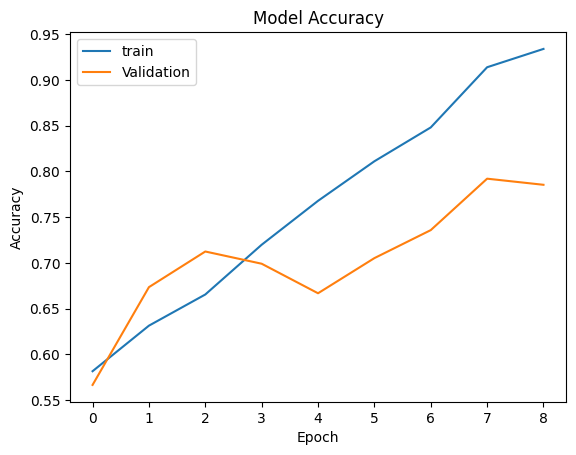

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history2.history :
    k = 'accuracy'

if 'acc' in history2.history :
    k = 'acc'

if k != '' :
    plt.plot(history2.history[k])
    plt.plot(history2.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

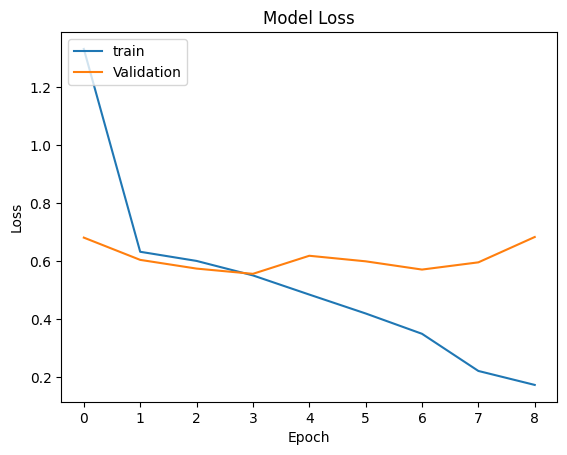

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model2.evaluate(validation_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

57/57 [==============================] - 5s 79ms/step - loss: 0.5569 - accuracy: 0.6991
Test Loss: 0.5569
Test Accuracy: 69.91%


In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model2.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 1s 38ms/step
              precision    recall  f1-score   support

        Cats       0.65      0.90      0.76       513
        Dogs       0.84      0.51      0.63       505

    accuracy                           0.71      1018
   macro avg       0.75      0.71      0.69      1018
weighted avg       0.74      0.71      0.70      1018

[[464  49]
 [249 256]]


# Model3

In [ ]:
init = VarianceScaling(scale = 2,mode = "fan_in",distribution = "uniform")

# Three Conv Layers , Maxpooling and BatchNormalization
# kernel size 3
# Flatten Layer
# Fully connected layer : 3 Dense layers and dropout by 0.75

model3 = Sequential()

model3.add(layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256,256, 3),kernel_initializer=init))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',kernel_initializer=init))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',kernel_initializer=init))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())

model3.add(layers.Dense(256, activation='relu',kernel_initializer=init))
model3.add(layers.Dropout(0.75))
model3.add(layers.Dense(128, activation='relu',kernel_initializer=init))
model3.add(layers.Dense(2, activation='softmax',kernel_initializer=init))

model3.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
lr_schedule = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history1 = model3.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
      callbacks=[early_stopping,lr_schedule]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 777s 3s/step - loss: 4.9825 - accuracy: 0.5353 - val_loss: 0.6359 - val_accuracy: 0.5979 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 30s 132ms/step - loss: 0.6561 - accuracy: 0.5957 - val_loss: 0.6093 - val_accuracy: 0.6730 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 32s 138ms/step - loss: 0.6055 - accuracy: 0.6622 - val_loss: 0.6032 - val_accuracy: 0.6952 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 30s 127ms/step - loss: 0.5760 - accuracy: 0.6959 - val_loss: 0.5556 - val_accuracy: 0.7319 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 30s 132ms/step - loss: 0.5224 - accuracy: 0.7390 - val_loss: 0.5461 - val_accuracy: 0.7336 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 30s 130ms/step - loss: 0.4810 - accuracy: 0.7811 - val_loss: 0.5514 - val_accuracy: 0.7397 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 29s 125ms/s

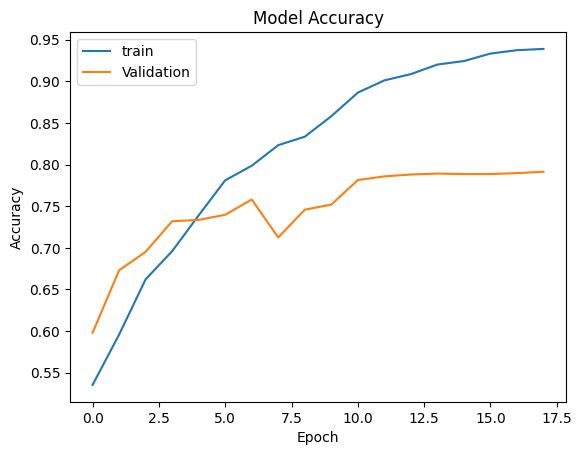

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history1.history :
    k = 'accuracy'

if 'acc' in history1.history :
    k = 'acc'

if k != '' :
    plt.plot(history1.history[k])
    plt.plot(history1.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

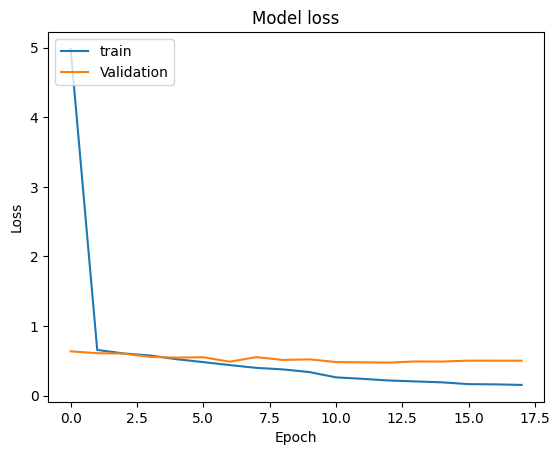

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model3.evaluate(Test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

32/32 [==============================] - 139s 3s/step - loss: 0.4963 - accuracy: 0.7839
Test Loss: 0.4963
Test Accuracy: 78.39%


In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model3.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

        Cats       0.79      0.78      0.78       513
        Dogs       0.78      0.79      0.78       505

    accuracy                           0.78      1018
   macro avg       0.78      0.78      0.78      1018
weighted avg       0.78      0.78      0.78      1018

[[399 114]
 [106 399]]


# Model4

In [ ]:
init = VarianceScaling(scale = 2,mode = "fan_avg",distribution = "uniform")
model4 = Sequential()

# Five Conv Layers , Maxpooling and BatchNormalization
# kernel size 5
# Flatten Layer
# Fully connected layer : 2 Dense layers and 2 dropout by 0.5
model4.add(layers.Conv2D(filters=32, kernel_size= (5, 5), activation='relu', input_shape=(256,256, 3),kernel_initializer=init))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Flatten())

model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(256, activation='relu',kernel_initializer=init))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(2, activation='softmax',kernel_initializer=init))

model4.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization (Batch  (None, 122, 122, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
lr_schedule = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history4 = model4.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
      callbacks=[early_stopping,lr_schedule]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 465s 2s/step - loss: 2.0218 - accuracy: 0.5302 - val_loss: 0.6914 - val_accuracy: 0.5195 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 34s 149ms/step - loss: 0.6994 - accuracy: 0.5457 - val_loss: 0.6786 - val_accuracy: 0.5857 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 30s 131ms/step - loss: 0.6811 - accuracy: 0.5645 - val_loss: 0.6557 - val_accuracy: 0.6062 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 29s 126ms/step - loss: 0.6550 - accuracy: 0.6162 - val_loss: 0.6596 - val_accuracy: 0.6001 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 30s 131ms/step - loss: 0.6356 - accuracy: 0.6385 - val_loss: 0.7439 - val_accuracy: 0.5289 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 30s 131ms/step - loss: 0.6155 - accuracy: 0.6568 - val_loss: 0.6767 - val_accuracy: 0.5145 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 30s 131ms/s

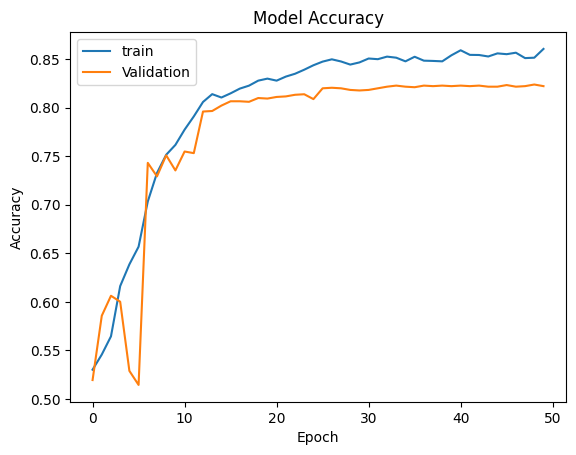

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history4.history :
    k = 'accuracy'

if 'acc' in history4.history :
    k = 'acc'

if k != '' :
    plt.plot(history4.history[k])
    plt.plot(history4.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

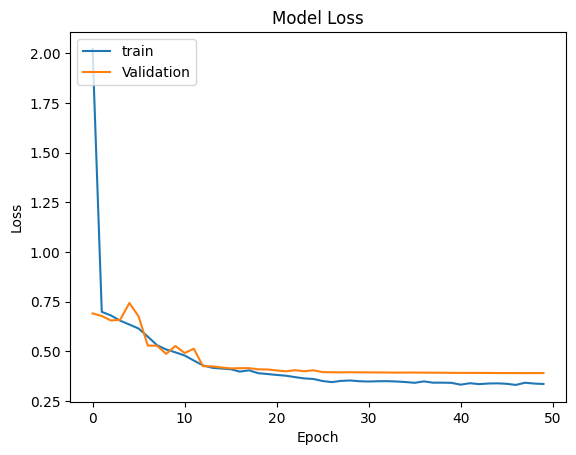

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model4.evaluate(Test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

32/32 [==============================] - 76s 2s/step - loss: 0.3762 - accuracy: 0.8438
Test Loss: 0.3762
Test Accuracy: 84.38%


In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model4.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 1s 32ms/step
              precision    recall  f1-score   support

        Cats       0.84      0.86      0.85       513
        Dogs       0.85      0.83      0.84       505

    accuracy                           0.84      1018
   macro avg       0.84      0.84      0.84      1018
weighted avg       0.84      0.84      0.84      1018

[[440  73]
 [ 86 419]]


# Model5

In [ ]:
model5 = Sequential()

# Three Conv Layers , Maxpooling and BatchNormalization
# kernel size 5
# Flatten Layer
# Fully connected layer : 2 Dense layers and 1 dropout by 0.5

model5.add(layers.Conv2D(filters=32, kernel_size= (5, 5), activation='relu', input_shape=(256, 256, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Flatten())

model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dropout(0.75))
model5.add(layers.Dense(2, activation='softmax'))

model5.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 252, 252, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Bat  (None, 122, 122, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
lr_schedule = ReduceLROnPlateau(factor=0.01, patience=3, min_lr=1e-9)
early_stopping = EarlyStopping(patience=7, restore_best_weights=True)
history5 = model5.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
      callbacks=[early_stopping,lr_schedule]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 860s 3s/step - loss: 5.7825 - accuracy: 0.5343 - val_loss: 0.6760 - val_accuracy: 0.5829 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 32s 138ms/step - loss: 0.6907 - accuracy: 0.5527 - val_loss: 0.9879 - val_accuracy: 0.5918 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 32s 138ms/step - loss: 0.7697 - accuracy: 0.5397 - val_loss: 0.6891 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 31s 137ms/step - loss: 0.6951 - accuracy: 0.5295 - val_loss: 0.6512 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 31s 136ms/step - loss: 0.6778 - accuracy: 0.5554 - val_loss: 0.6602 - val_accuracy: 0.6001 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 31s 136ms/step - loss: 0.6812 - accuracy: 0.5354 - val_loss: 0.6824 - val_accuracy: 0.6129 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 32s 138ms/s

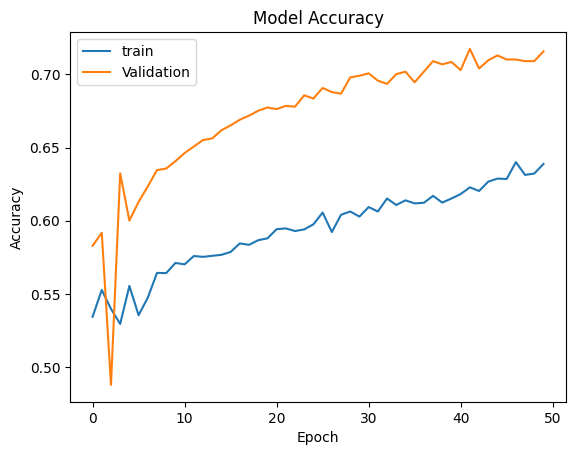

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history5.history :
    k = 'accuracy'

if 'acc' in history5.history :
    k = 'acc'

if k != '' :
    plt.plot(history5.history[k])
    plt.plot(history5.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

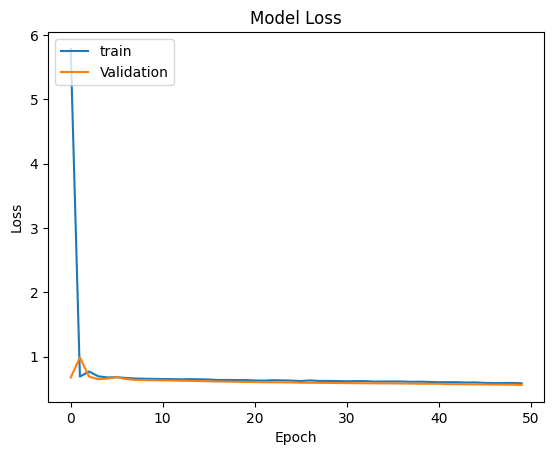

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model5.evaluate(validation_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

57/57 [==============================] - 5s 72ms/step - loss: 0.5614 - accuracy: 0.7158
Test Loss: 0.5614
Test Accuracy: 71.58%


In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model5.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 2s 47ms/step
              precision    recall  f1-score   support

        Cats       0.67      0.81      0.74       513
        Dogs       0.76      0.60      0.67       505

    accuracy                           0.71      1018
   macro avg       0.72      0.71      0.70      1018
weighted avg       0.72      0.71      0.70      1018

[[418  95]
 [202 303]]


# Model6

In [ ]:
init = VarianceScaling(scale = 2,mode = "fan_avg",distribution = "uniform")
model6 = Sequential()

# Three Conv Layers , Maxpooling and BatchNormalization
# kernel size 3
# Flatten Layer
# Fully connected layer : 3 Dense layers and dropout by 0.5
model6.add(layers.Conv2D(filters=32, kernel_size= (5, 5), activation='relu', input_shape=(256, 256, 3),kernel_initializer=init))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu',kernel_initializer=init))
model6.add(layers.MaxPooling2D((2, 2)))


model6.add(layers.Flatten())
model6.add(layers.Dense(256, activation='relu',kernel_initializer=init))
model6.add(layers.Dense(128, activation='relu',kernel_initializer=init))
model6.add(layers.Dense(64, activation='relu',kernel_initializer=init))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(2, activation='sigmoid',kernel_initializer=init))

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 252, 252, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Bat  (None, 122, 122, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
lr_schedule = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-5)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history6 = model6.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
      callbacks=[early_stopping,lr_schedule]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 1419s 6s/step - loss: 1.3069 - accuracy: 0.5238 - val_loss: 0.6916 - val_accuracy: 0.5189 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 31s 138ms/step - loss: 0.6945 - accuracy: 0.5272 - val_loss: 0.6804 - val_accuracy: 0.5873 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 32s 138ms/step - loss: 0.6870 - accuracy: 0.5670 - val_loss: 0.6706 - val_accuracy: 0.5929 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 31s 136ms/step - loss: 0.6747 - accuracy: 0.5884 - val_loss: 0.6833 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 31s 137ms/step - loss: 0.6795 - accuracy: 0.5784 - val_loss: 0.7843 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 32s 138ms/step - loss: 0.6670 - accuracy: 0.6095 - val_loss: 0.9221 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 36s 160ms/

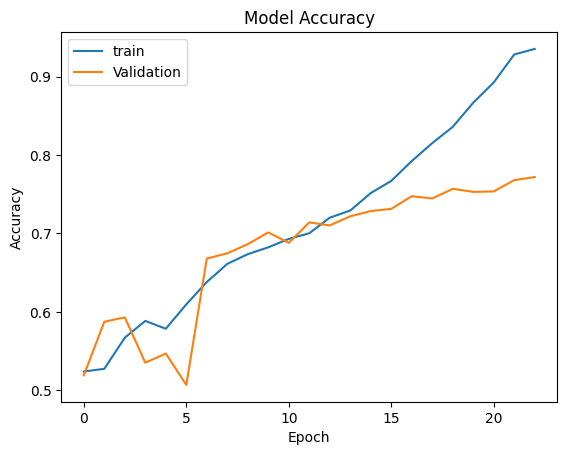

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history6.history :
    k = 'accuracy'

if 'acc' in history6.history :
    k = 'acc'

if k != '' :
    plt.plot(history6.history[k])
    plt.plot(history6.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

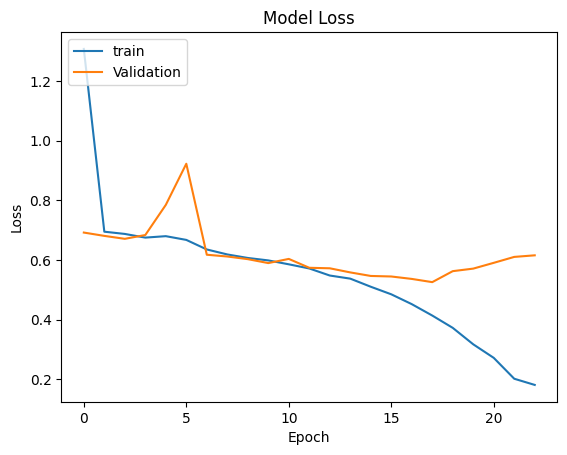

In [ ]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model6.evaluate(validation_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

57/57 [==============================] - 4s 68ms/step - loss: 0.5255 - accuracy: 0.7447
Test Loss: 0.5255
Test Accuracy: 74.47%


In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model6.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 2s 58ms/step
              precision    recall  f1-score   support

        Cats       0.77      0.73      0.75       513
        Dogs       0.74      0.78      0.76       505

    accuracy                           0.75      1018
   macro avg       0.75      0.75      0.75      1018
weighted avg       0.75      0.75      0.75      1018

[[372 141]
 [110 395]]


# Pretrained Model

In [ ]:
pretrained_model =  VGG16(
    include_top=False,
    input_shape=(image_size[0], image_size[1], 3),
    weights='imagenet'
)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Fine-tune more layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(3, (1, 1), input_shape=(image_size[0], image_size[1], 3)))
model.add(pretrained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 3)       12        
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 14780622 (56.38 MB)
Trainable params: 65934 (257.55 KB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [ ]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
      callbacks=[ early_stopping,lr_schedule]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 1584s 7s/step - loss: 0.9945 - accuracy: 0.8228 - val_loss: 0.2620 - val_accuracy: 0.9238 - lr: 1.0000e-04
Epoch 2/20
225/225 [==============================] - 92s 405ms/step - loss: 0.2420 - accuracy: 0.9291 - val_loss: 0.1696 - val_accuracy: 0.9483 - lr: 1.0000e-04
Epoch 3/20
225/225 [==============================] - 92s 404ms/step - loss: 0.1607 - accuracy: 0.9498 - val_loss: 0.1412 - val_accuracy: 0.9538 - lr: 1.0000e-04
Epoch 4/20
225/225 [==============================] - 91s 402ms/step - loss: 0.1226 - accuracy: 0.9619 - val_loss: 0.1260 - val_accuracy: 0.9594 - lr: 1.0000e-04
Epoch 5/20
225/225 [==============================] - 91s 403ms/step - loss: 0.0965 - accuracy: 0.9675 - val_loss: 0.1199 - val_accuracy: 0.9638 - lr: 1.0000e-04
Epoch 6/20
225/225 [==============================] - 91s 403ms/step - loss: 0.0771 - accuracy: 0.9726 - val_loss: 0.1143 - val_accuracy: 0.9661 - lr: 1.0000e-04
Epoch 7/20
225/225 [====================

In [ ]:
test_loss, test_acc = model.evaluate(Test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

32/32 [==============================] - 190s 4s/step - loss: 0.1179 - accuracy: 0.9676
Test Loss: 0.1179
Test Accuracy: 96.76%


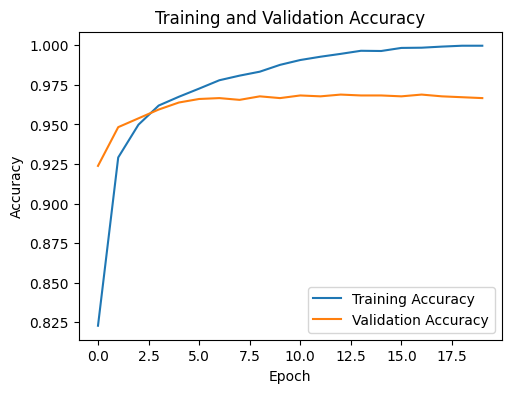

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
x_test = []
y_test = []
for batch_x, batch_y in Test:
  for i in batch_x:
    x_test.append(i.numpy())
  for i in batch_y:
    y_test.append(i.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

predictions1 = model.predict(x_test)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_test, predictions1,
                            target_names=["Cats", "Dogs"]))

print(metrics.confusion_matrix(y_test, predictions1))

32/32 [==============================] - 5s 159ms/step
              precision    recall  f1-score   support

        Cats       0.97      0.97      0.97       513
        Dogs       0.97      0.97      0.97       505

    accuracy                           0.97      1018
   macro avg       0.97      0.97      0.97      1018
weighted avg       0.97      0.97      0.97      1018

[[497  16]
 [ 17 488]]
